# 2021.01.19 String & Advanced Function Concept + @


## String

* 문자형 데이터를 저장하는 Sequence 자료형
* ASCII code 1글자 = 1byte

### 문자열 특징
* Indexing: 문자열의 각 위치를 offset으로 접근
  * List와 유사하지만 문자열은 값을 수정할 수 없음
* Slicing: offset을 기반으로 부분값 반환
  * List와 유사하지만 값 수정 불가


### 문자열 함수

In [ ]:
a = "Hello world"

len(a) # 문자열의 문자 개수 반환
a.upper() # 대문자로 변환
a.lower() # 소문자로 변환
a.capitalize() # 첫 문자를 대문자로 변환
a.title() # 띄어쓰기 후 첫 글자만 대문자로
a.count('abc') # 문자열 a에 'abc'가 들어간 횟수
a.find('abc')
a.rfind('abc') # 문자열 a에 'abc'가 들어간 위치를 앞/뒤에서부터 검색
a.startswith('abc')
a.endswith('abc') # 문자열 a가 'abc'로 시작/끝나는지 여부
a.strip() # 문장 앞뒤 공백 제거
a.strip("_") # 문장 앞뒤 "_" 제거
a.lstrip()
a.rstrip() # 문장 왼/오른쪽 공백 제거
a.split() # 공백 기준으로 string을 나눠 list로
a.split("tmp") # "tmp"에 들어가는 substring을 기준으로 string을 나눠 list로
a.isdigit() # 문자열 a가 숫자인지 확인
a.isupper() 
a.islower() # 문자열 a가 모두 대문자/소문자로 구성되었는지 확인

### Raw String

* 일반 문자열의 경우 `\` (or `₩`)가 하나 쓰인 경우 escape 글자로 취급된다.
* raw string의 경우 escape 문자를 무시하고 그대로 출력된다.

In [ ]:
normal_string = "Hello\nworld"
raw_string = r"Hello\nworld"
print(normal_string)
print(raw_string)

## Advanced Function Concept

> Python function : Call By Reference

* Call By Reference
  * argument로 변수의 메모리 주소를 넘기는 방식
  * argument의 값을 변경 시 호출한 함수의 variable의 값도 바뀜


In [ ]:
# Example
def change_list_val(input_list):
  input_list[0] = "Hello"

input_list = [0, 1, 2, 3]
print(input_list) # [0, 1, 2, 3]
change_list_val(input_list)
print(input_list) # ["Hello", 1, 2, 3]

* Scoping Rule
  * 지역변수와 전역변수
    * 지역변수: 함수 내에서만 사용
    * 전역변수: 프로그램 전체에서 사용

  * `global`
    * 함수 내에서 전역변수를 사용하고 싶을 때 사용

In [ ]:
def f():
	global g # 전역변수 g를 가져옴
	g = "I love London!"
	print(g)

g = "I love Paris!"
f()
print(g)

* Type Hint
  * 파이썬의 특징 : Dynamic Typing
  * 사용자가 Interface를 알기 어렵다는 단점을 보완하는 기능

In [ ]:
# Example
def type_hint_example(name: str) -> str:
	return f"Hello, {name}"

print(type(type_hint_example("spring")))

## Additional Material - Regex(정규표현식)

### Regex란?

> **특정한 규칙을 가진 문자열의 집합을 표현하는 데 사용하는 형식 언어**

### 왜 Regex를 쓰는가?
* 전화번호 형태의 데이터를 처리하는 문제
  * 전화번호의 형식은 정해진 몇가지 패턴을 따른다. (ex. 112, 02-123-4567, 010-3333-3333, 333-3333, ...)
  * 일일이 패턴을 파악하는 코드를 짜는 것도 문제를 해결하는 방법이지만 코드 가독성이...
  * 만약 새로운 패턴이 추가되거나 없어진다면...?

In [ ]:
# Regex를 사용하지 않는 경우
# 전화번호 형식은 편의를 위해 @@@, @@@-@@@@, @@@-@@@@-@@@@로 고정되었다고 가정
def is_phone_number_naive(number_string):
    num_string_list = number_string.split("-")
    if len(num_string_list) < 1 or len(num_string_list) > 3:
        return False
    if not num_string_list[0].isdigit() or len(num_string_list[0]) != 3:
        return False
    if len(num_string_list) > 1:
        if not num_string_list[1].isdigit() or len(num_string_list[1]) != 4:
            return False
    if len(num_string_list) > 2:
        if not num_string_list[2].isdigit() or len(num_string_list[2]) != 4:
            return False
    return True

In [ ]:
print(is_phone_number_naive("112")) # True
print(is_phone_number_naive("1234")) # False
print(is_phone_number_naive("010-1234-5678")) # True
print(is_phone_number_naive("010-1234-5678-9012")) # False


* 하지만 동일한 문제를 정규표현식으로 풀 경우 훨씬 간단해집니다!


In [ ]:
import re

def is_phone_number_regex(number_string):
    pattern_list = ["[0-9]{3}", "[0-9]{3}-[0-9]{4}", "[0-9]{3}-[0-9]{4}-[0-9]{4}"]
    # 패턴 추가/수정/제거는 pattern_list 내의 element만 수정하면 끝!
    p = re.compile("|".join(pattern_list))
    if p.fullmatch(number_string) is None:
        return False
    return True

In [ ]:
print(is_phone_number_regex("112")) # True
print(is_phone_number_regex("1234")) # False
print(is_phone_number_regex("010-1234-5678")) # True
print(is_phone_number_regex("010-1234-5678-9012")) # False

* 코드 가독성도 높고 유지보수에도 편리하기 때문에 규칙성이 뚜렷한 경우 Regex를 사용하는 것이 편리!

## Regex에서 쓰이는 기본 Syntax

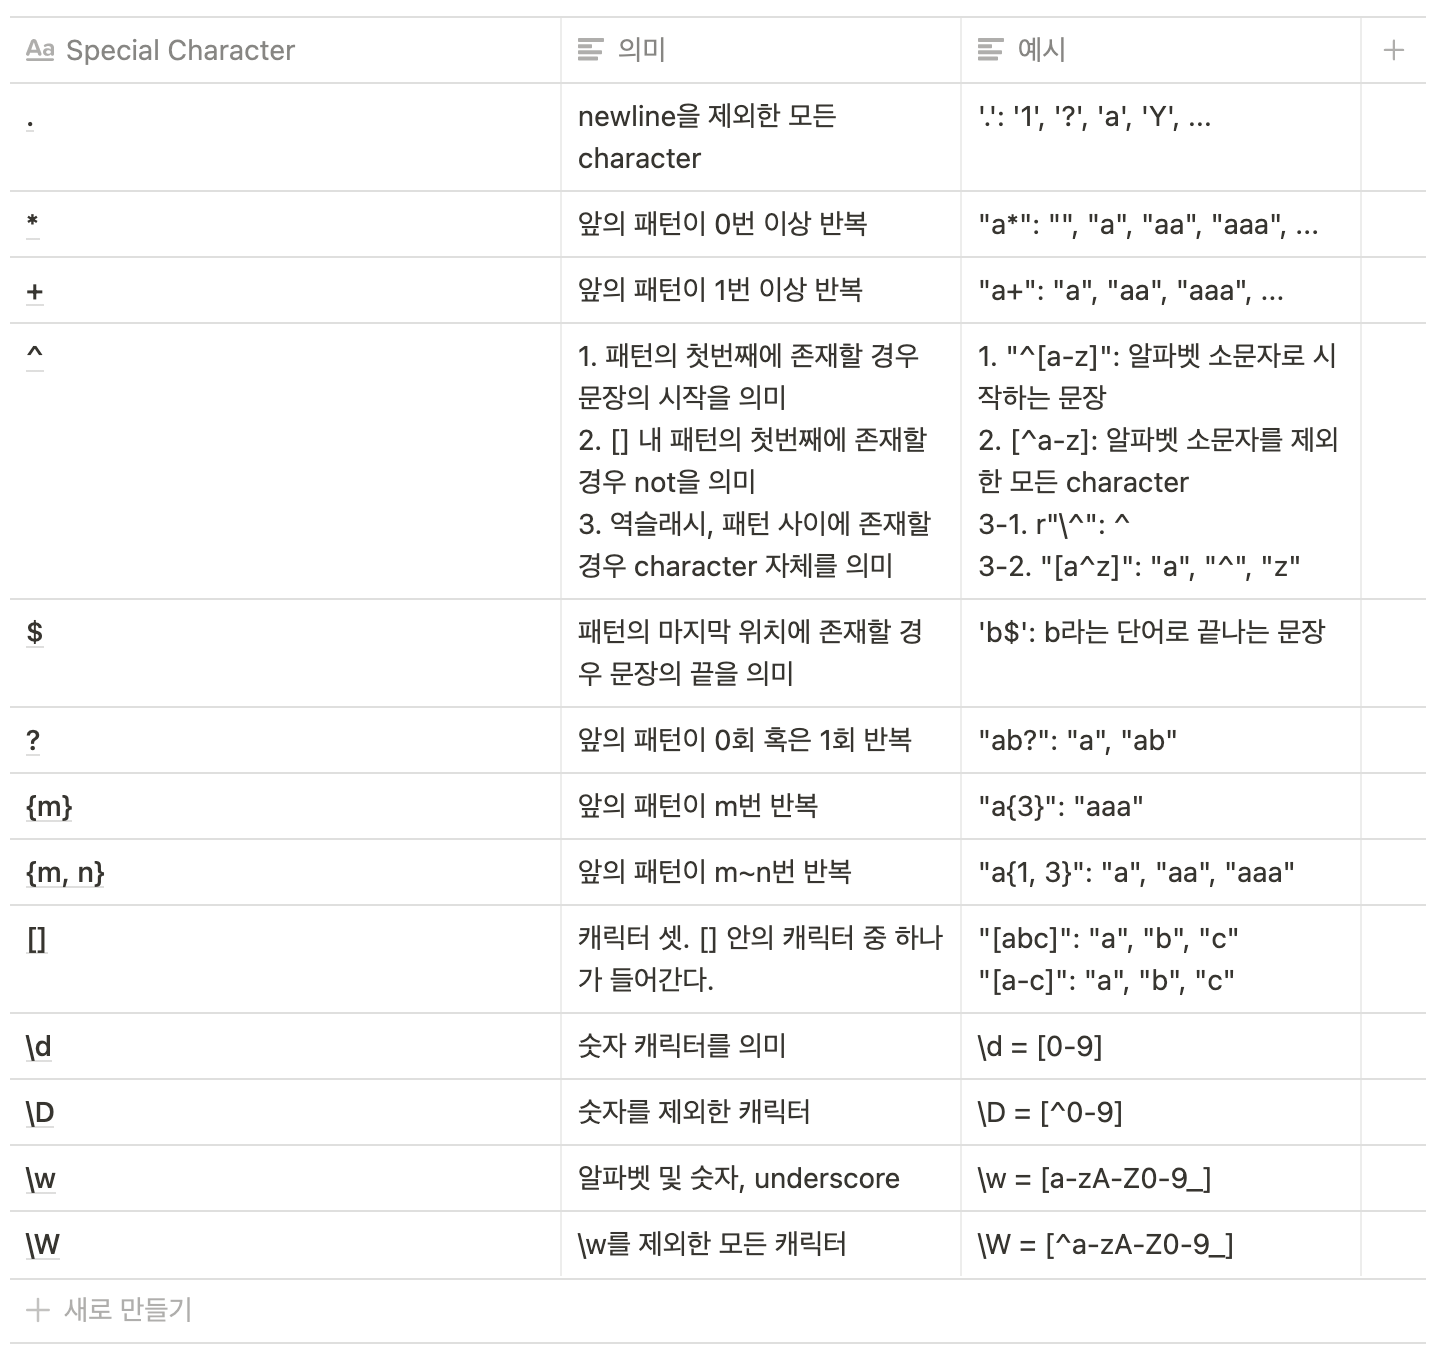

* Regex Special Character의 \(₩)는 escape가 아닌 일반 문자
* raw string을 사용하는 것을 권장

In [ ]:
# Example
print(re.search(r"[0-9]{3}", "___234___"))
print(re.search(r"\w+", "___hello___"))

## Regex 기본 함수

* regex의 특징: 일정한 규칙을 하나의 패턴으로 정의하여 규칙을 만족하는 문장에 대한 작업이 가능

In [ ]:
# compile: 일정한 패턴을 컴파일하여 regex object를 생성
p_string = r"[0-9]{3,4}-[0-9]{4}"
p = re.compile(p_string)

In [ ]:
# match: 특정한 string이 패턴 p로 시작되는지 검사
print(re.match(p_string, "123-4567")) # p.match("123-4567")도 동일하게 작동
print(re.match(p_string, "123-4567-89"))

In [ ]:
# fullmatch: 특정한 string이 패턴 p와 일치하는지 검사
print(re.fullmatch(p_string, "123-4567")) # p.fullmatch("123-4567")도 동일하게 작동
print(re.fullmatch(p_string, "123-4567-89"))

In [ ]:
# search: 특정한 string에 패턴 p가 가장 먼저 나타나는 위치를 탐색
print(re.search(p_string, "____123-4567____")) # p.search("____123-4567____")

In [ ]:
# findall: 특정한 string에 패턴 p와 일치하는 substring을 list로 리턴
print(re.findall(p_string, "___123-4567___hello___1234-5678__")) # p.findall("___123-4567___hello___1234-5678__")

In [ ]:
# finditer: 특정한 string에 패턴 p와 일치하는 substring을 Match object에 대한 iterabtor로 리턴
iter = re.finditer(p_string, "___123-4567___hello___1234-5678__") # p.finditer("___123-4567___hello___1234-5678__")
for i in iter:
    print(i)

In [ ]:
# sub: p에 정의된 패턴과 일치하는 substring을 다른 string으로 replace
print(re.sub(p_string,"phone-number", "___123-4567___")) # p.sub("phone-number", "___123-4567___")

In [ ]:
# Match object: match, search, finditer 등의 함수에서 패턴과 일치하는 string의 위치를 반환할 때 사용하는 object
target = "___1234-5678___"
m = re.search(p_string, target)
print(m)

# group: 패턴과 일치하는 string을 리턴
print(m.group())

# span: 패턴이 발견된 위치를 리턴
print(m.span())
p_start, p_end = m.span()
print(target[p_start:p_end])

* 함수에 대한 자세한 내용은 [파이썬 Doc](https://docs.python.org/3/library/re.html) 참고